,variable,value,group
0,Age,79,expert
1,Age,99,expert
2,Age,41,expert
3,Age,51,expert
4,Age,56,expert
...,...,...,...
76,Age,74,non-expert
77,Age,50,non-expert
78,Age,67,non-expert
79,Age,77,non-expert


No handles with labels found to put in legend.


,variable,value,group
0,body weight,44.4,expert
1,body weight,48.7,expert
2,body weight,65.5,expert
3,body weight,55.7,expert
4,body weight,76.9,expert
...,...,...,...
76,body weight,68.5,non-expert
77,body weight,63.4,non-expert
78,body weight,60.3,non-expert
79,body weight,52.1,non-expert


No handles with labels found to put in legend.


,variable,value,group
0,BMI,20.519068,expert
1,BMI,24.357356,expert
2,BMI,23.429809,expert
3,BMI,21.408511,expert
4,BMI,26.608997,expert
...,...,...,...
76,BMI,22.755774,non-expert
77,BMI,22.224396,non-expert
78,BMI,23.881935,non-expert
79,BMI,22.910525,non-expert


No handles with labels found to put in legend.


,variable,value,group
0,Creatinine clearance,43.208333,expert
1,Creatinine clearance,21.625828,expert
2,Creatinine clearance,117.774039,expert
3,Creatinine clearance,20.180580,expert
4,Creatinine clearance,46.972077,expert
...,...,...,...
76,Creatinine clearance,120.753205,non-expert
77,Creatinine clearance,90.056818,non-expert
78,Creatinine clearance,117.572115,non-expert
79,Creatinine clearance,25.326389,non-expert


No handles with labels found to put in legend.


,variable,value,group
0,Alb,2.8,expert
1,Alb,3.1,expert
2,Alb,3.1,expert
3,Alb,1.6,expert
4,Alb,2.1,expert
...,...,...,...
76,Alb,2.2,non-expert
77,Alb,3.3,non-expert
78,Alb,2.7,non-expert
79,Alb,2.9,non-expert


No handles with labels found to put in legend.
<ipython-input-1-5ffdba3080b6>:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


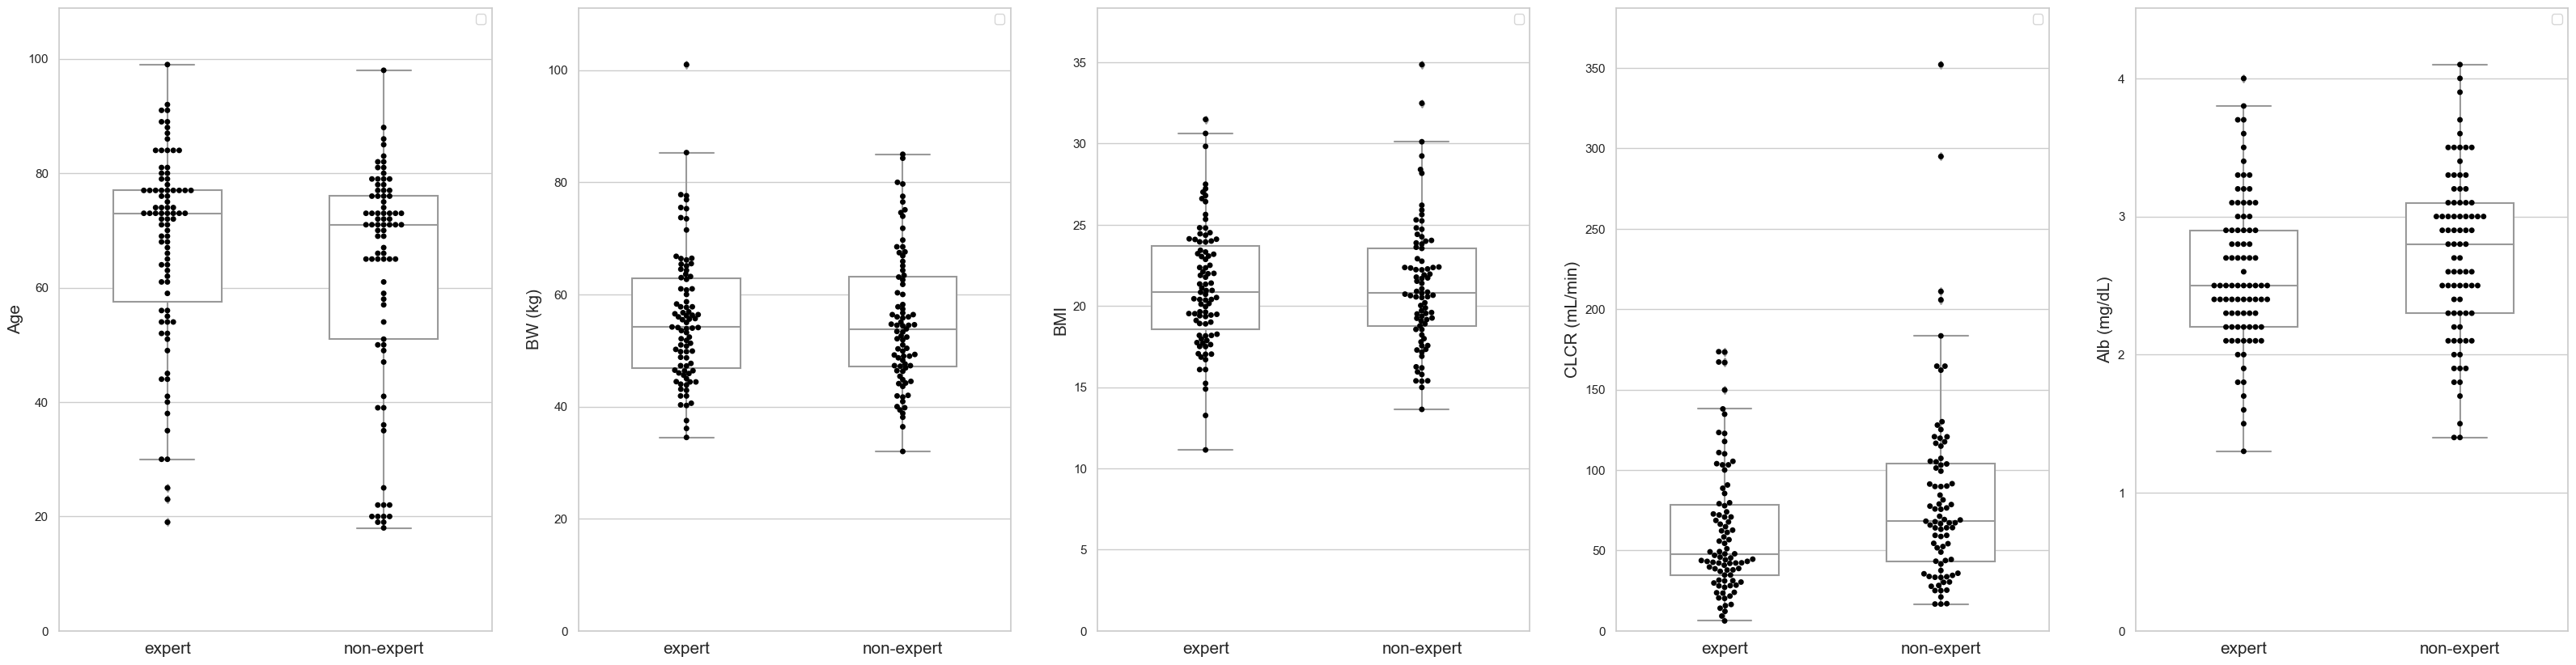

In [1]:
#TEIC-model1.1 (demographic) 

filepath1 ="" #filepath to the non-expert data (TEIC-table11)
filepath2 ="" #filepath to the expert data (TEIC-table7)
filepath3 ="" #filepath to the folder where to save the result

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Set3")

data = pd.read_csv(filepath1)#non-expert data
data_2 = pd.read_csv(filepath2)#expert data

fig = plt.figure(figsize=(40.0, 10.0))
for i,j,k in zip(["Age","body weight","BMI","Creatinine clearance","Alb"],range(1,6),["Age","BW (kg)","BMI","CLCR (mL/min)","Alb (mg/dL)"]):
    #data1
    dfnon_expert = pd.DataFrame(data[i])
    dfnon_expert_melt = pd.melt(dfnon_expert)
    dfnon_expert_melt["group"] = "non-expert"
    #data2
    dfexpert = pd.DataFrame(data_2[i])
    dfexpert_melt = pd.melt(dfexpert)
    dfexpert_melt["group"] = "expert"
    df = pd.concat([dfexpert_melt, dfnon_expert_melt], axis=0)
    display(df)
    maximum = max([dfexpert.max().max(),dfnon_expert.max().max()])
    ax = fig.add_subplot(1, 5, j) #5はparameterの数
    sns.boxplot(x =df["group"], y=df["value"],  color="white", width=0.5,ax=ax)
    sns.swarmplot(x =df["group"], y=df["value"], color="black", ax=ax)
    plt.xticks(fontsize=15)
    ax.set_xlabel("",fontsize = 15)
    ax.set_ylabel(k,fontsize = 15)
    ax.set_ylim(0,1.1*maximum)
    ax.legend()
fig.show()
fig.savefig(str(filepath3)+"/TEIC_figureA.png",format="png", dpi=300)